In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("data2.csv") # read comma separated data
print(data.head()) # print some values

   Size   Bedrooms   Price
0  2104          3  399900
1  1600          3  329900
2  2400          3  369000
3  1416          2  232000
4  3000          4  539900


In [4]:
X = data.iloc[:, :2] # 2 features
Y = data.iloc[:, 2] # labels
X = np.array(X)
Y = np.array(Y)
m = len(Y) # the size of the training example

In [5]:
def featureNormalize(X):
    """
    FEATURENORMALIZE(X) returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when
    working with learning algorithms.
    """
    mu = np.mean(X)
    sigma = np.std(X)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


In [6]:
def computeCostMulti(X, Y, theta):
    """
    Cost Function
    X --> Feature Matrix
    Y --> An array of target values
    theta --> initial value of theta
    """
    m = len(Y) # number of training examples
    J = np.sum((X.dot(theta) - Y) ** 2)/(2 * m)
    return J

In [13]:
def gradientDescentMulti(X, Y, theta, alpha, num_iters):
    """
    GRADIENTDESCENTMULTI Performs gradient descent to learn theta
    X --> Feature Matrix
    Y --> An array of target values
    theta --> initial value of theta
    alpha --> learning rate
    iterations --> max no. of iterations for algorithm
    """
    J_history = [0] * num_iters

    m = len(Y) 

    for i in range(num_iters):
        # theta[i] = theta[i] - alpha / m * np.sum((X * theta[i] - Y)*X)
        # J_history[i] = computeCostMulti(X, Y, theta)

        h = X.dot(theta)
        loss = h - Y
        gradient = X.T.dot(loss) / m

        theta = theta - alpha * gradient

        cost = computeCostMulti(X, Y, theta)
        J_history[i] = cost

    return theta, J_history

In [20]:
X_norm, mu, sigma = featureNormalize(X)
X_padded = np.column_stack((np.ones((m,1)), X_norm)) # Add a column of ones to x

# Choose some alpha value
alpha = 0.01
num_iters = 400

# Init Theta and Run Gradient Descent 
theta = np.zeros(X_padded.shape[1])

In [21]:
theta, J_history = gradientDescentMulti(X_padded, Y, theta, alpha, num_iters)

In [22]:
theta

array([ 119999.41363909,  148539.68555667, -104839.19814394])

Text(0, 0.5, 'Error')

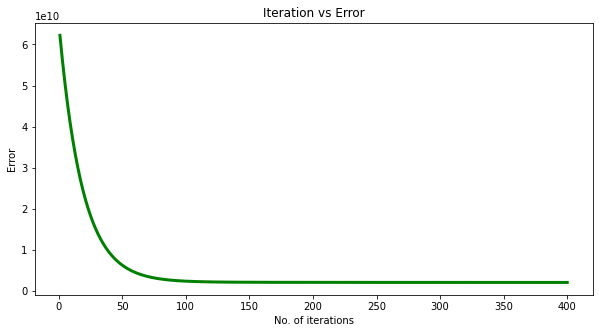

In [31]:
# Draw a cost function
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, len(J_history)+1), J_history, color="green", linewidth=3)
plt.title("Iteration vs Error")
plt.xlabel("No. of iterations")
plt.ylabel("Error")

In [37]:
def pred(x_test, newB):
    """
    Predict for new numbers & Test for the new numbers
    """
    return x_test.dot(newB)

ans = pred(np.array([1.,4.3,4.5]), theta) # before inputting any numbers, do not forget to scale them
print(int(ans), "$") # the new price

286943 $
